In [1]:
%matplotlib widget



Bad key text.latex.preview in file C:\Users\esera\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\esera\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\esera\Miniconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You pr

In [2]:
import numpy as np
import random

def init_grid(size, color, start, start_color):
    grid = np.empty((size, size), dtype=int)
    grid.fill(color)

    grid[start] = start_color
    return grid

cells_range = {'up' : lambda x, y, length : (x,x+1,y,y+length),
    'down' : lambda x, y, length : (x,x+1,y-length+1,y+1),
    'left' : lambda x, y, length : (x-length+1,x+1,y,y+1),
    'right' : lambda x, y, length : (x,x+length,y,y+1),
    }
    

def match(grid, cell, rule, direction):
    rule_colors = rule[0] if direction=='up' or direction=='right' else np.flip(rule[0])
    x,y = cell
    x_start, x_end, y_start, y_end = cells_range[direction](x,y,len(rule_colors))
   
    return np.array_equal(rule_colors,grid[x_start:x_end,y_start:y_end].reshape(-1))

direction = ['up', 'down', 'left', 'right']

def find_matchings(grid, rule):
    size = len(grid)
    return [((x,y), rule, dir) for x in range(size) for y in range(size) for dir in direction if match(grid, (x,y), rule, dir)]

def apply_matching(grid, matching):
    (x,y), rule, direction = matching

    rule_colors = rule[1] if direction=='up' or direction=='right' else np.flip(rule[1])
    x_start, x_end, y_start, y_end = cells_range[direction](x,y,len(rule_colors))

    r = grid[x_start:x_end, y_start:y_end].reshape(-1)
    r[:] =  rule_colors
    return grid

def one_step(grid, rule):
    matchings = find_matchings(grid, rule)
    matching = random.choice(matchings)
    return  apply_matching(grid, matching)


def create_rule(from_, to):
    return (np.array(from_), np.array(to))


In [3]:
grid = init_grid(10, 1, (0,0), 2)
grid

array([[2, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])

In [4]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import colors

grid = np.array([[1,1],[0,0]])
def print_grid(ax, grid, repr_cell):
   im = ax.imshow(np.array([[repr_cell(cell) for cell in row ]for row in grid ]))

repr_cell =  {0: colors.to_rgb('red'),
            1: colors.to_rgb('black')}



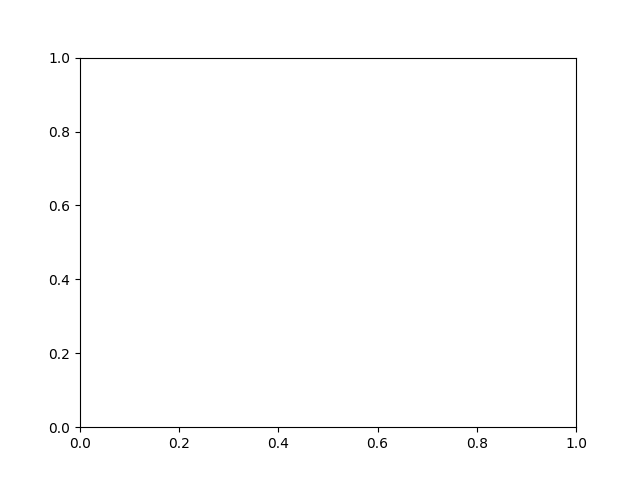

In [5]:
fig, ax = plt.subplots()

repr_cell =  {0: colors.to_rgb('red'),
            1: colors.to_rgb('black')}
def animate(frame_num):
   if frame_num%2==0:
      print_grid(ax, np.array([[1,1],[0,0]]), lambda x : repr_cell[x])
   else:
      print_grid(ax, np.array([[0,0],[1,1]]), lambda x: repr_cell[x])


anim = FuncAnimation(fig, animate, frames=100, interval=1)
plt.show()

In [18]:
rule = create_rule([2,1,1], [3,3,2])
for loop in range(10):
    grid = one_step(grid, rule)
    print(grid)
    print()

IndexError: Cannot choose from an empty sequence

In [ ]:
apply_matching(grid, matchings[1])

In [9]:
b = np.arange(10)
a == b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [8]:
a[-10:2]

array([0, 1])